In [1]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  
from scipy.stats.stats import pearsonr
from google.colab import drive

In [2]:
drive.mount('mydrive')

Mounted at mydrive


In [3]:
spoti = pd.read_csv ("/content/mydrive/MyDrive/EDEM/PEP/spotify_edited.csv", sep= ";") 
spoti

,ID,title,artist,genre,year,bpm,nrgy,dnce,val,dur,lyrics,pop
0,1,"Hey, Soul Sister",Train,no pop,2010,97,89,67,80,217,4,83
1,2,Love The Way You Lie,Eminem,no pop,2010,87,93,75,64,263,23,82
2,3,TiK ToK,Kesha,pop,2010,120,84,76,71,200,14,80
3,4,Bad Romance,Lady Gaga,pop,2010,119,92,70,71,295,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,43,221,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,pop,2019,104,66,61,16,176,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,61,206,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,pop,2019,136,76,53,65,260,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,pop,2019,114,79,60,24,217,7,69


H4: Cuanto más energia tenga la canción, más popular será.

In [4]:
res= spoti.nrgy.describe().round(3)
res

count    603.000
mean      70.504
std       16.311
min        0.000
25%       61.000
50%       74.000
75%       82.000
max       98.000
Name: nrgy, dtype: float64

In [5]:
m  = res[1]
sd = res[2]
n  = res[0]
print("Mean:",m,"\n","Standard Deviation:",sd,"\n","N:",n)

Mean: 70.504 
 Standard Deviation: 16.311 
 N: 603.0


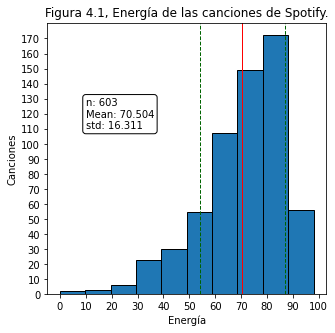

In [6]:
plt.figure(figsize=(5,5))
x=spoti.nrgy
plt.hist (x, bins=10,edgecolor="black")
plt.title("Figura 4.1, Energía de las canciones de Spotify.")
plt.xlabel("Energía")
plt.ylabel("Canciones")
props = dict (boxstyle="round", facecolor ="white", lw =1)
plt.xticks(np.arange(0, 110, step=10))
plt.yticks(np.arange(0, 175, step=10))
plt.text(10, 110, "n: 603" "\n" "Mean: 70.504" "\n" "std: 16.311", bbox=props)
plt.axvline(x=m, linewidth=1, linestyle= 'solid',color="red", label='Mean')
plt.axvline(x=(m+sd) , linewidth=1, linestyle= 'dashed',color="darkgreen", label='25%')
plt.axvline(x=(m-sd), linewidth=1, linestyle= 'dashed',color="darkgreen", label='75%')

In [8]:
x= spoti.nrgy
y=spoti["pop"]
pearsonr (x,y)
r, p_val = pearsonr(x,y)
n = len(spoti["pop"])
print('r:', round(r,3), 'P.Val:', round(p_val,3), 'n:', n)

r: -0.058 P.Val: 0.157 n: 603


Text(0, 85, '$\\mathrm{r}=-0.06$\n$\\mathrm{P.Val:}=0.157$\n$\\mathrm{n}=603$')

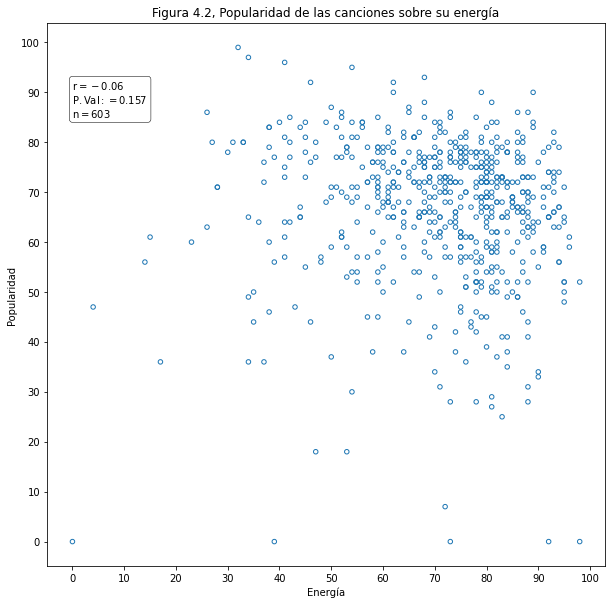

In [9]:
plt.figure(figsize=(10,10))
x= spoti.nrgy
y=spoti["pop"]
plt.scatter (x, y, s=20, facecolors="none", edgecolors="C0")
plt.xticks(np.arange(0,110,step=10))
plt.yticks(np.arange(0,110,step=10))
plt.title("Figura 4.2, Popularidad de las canciones sobre su energía")
plt.xlabel("Energía")
plt.ylabel("Popularidad")
props =dict(boxstyle ="round", facecolor ="white", lw=0.5)
textstr = '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (0,85, textstr , bbox=props)

Text(2, 85, '$\\mathrm{r}=-0.06$\n$\\mathrm{P.Val:}=0.157$\n$\\mathrm{n}=603$')

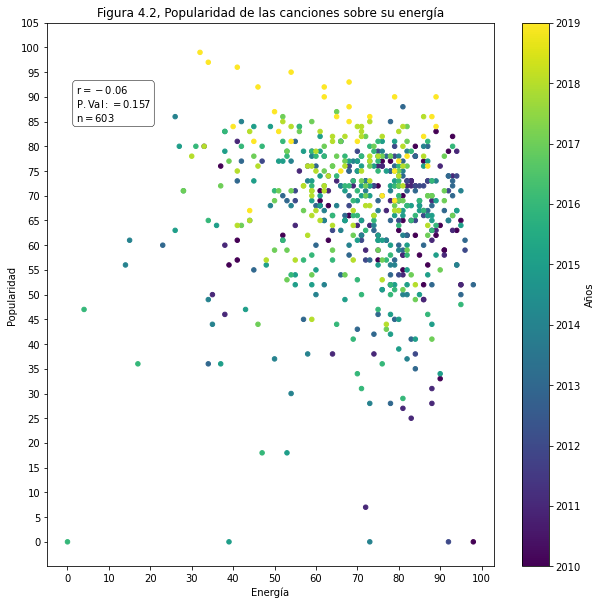

In [10]:
plt.figure(figsize=(10,10))
x= spoti.nrgy
y=spoti["pop"]
z=spoti.year
plt.scatter (x, y, s=20,facecolors="none", c= z)
plt.colorbar (label="Años", orientation="vertical")
plt.xticks(np.arange(0,110,step=10))
plt.yticks(np.arange(0,110,step=5))
plt.title("Figura 4.2, Popularidad de las canciones sobre su energía")
plt.xlabel("Energía")
plt.ylabel("Popularidad")
props =dict(boxstyle ="round", facecolor ="white", lw=0.5)
textstr = '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (2,85, textstr , bbox=props)
